In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import ListedColormap

In [97]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # Learning Rate
        self.n_iter = n_iter # Iteration(Epoch)  
        self.random_state = random_state # Random Seed
    
    # Learning from Dataset
    def fit(self, X, y): 
        rgen = np.random.RandomState(self.random_state) 
        # rgen.normal(loc=0.0, scale=0.01, size=1) => Ex: [0.01724345]
        # rgen.normal(loc=0.0, scale=0.01, size=3) => Ex: [0.01724345 -0.00611756 -0.00528172]
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) 
        self.errors_ = [] # Record Errors

        for _ in range(self.n_iter):
            errors = 0
            # xi => Predicted Label
            # target => Real Label
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                # Bias Unit
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # X => xi
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        # X => xi 
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [98]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [99]:
# df.iloc[0:100, 4] => Index: Value / df.iloc[0:100, 4].values => 1D Array
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [100]:
# [0, 2] => Extract 2 features (Sepal Length & Petal Length)
X = df.iloc[0:100, [0, 2]].values

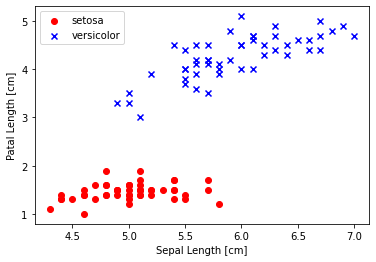

In [101]:
# Setosa Iris
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
# Versicolor Iris
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("Sepal Length [cm]")
plt.ylabel("Patal Length [cm]")
plt.legend(loc="upper left")
plt.show()

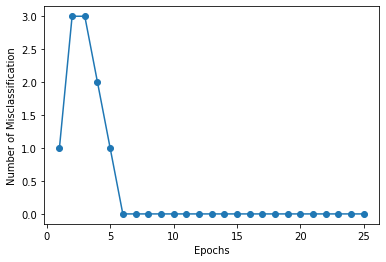

In [102]:
### Perceptron Instance
ppn = Perceptron(eta=0.01, n_iter=25)
ppn.fit(X, y)
# ppn.errors_ = [1, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Number of Misclassification")
plt.show() 

### Converge at sixth epoch

In [103]:
### Draw Decision Region Fn
def decision_region(X, y, classfier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], 
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)

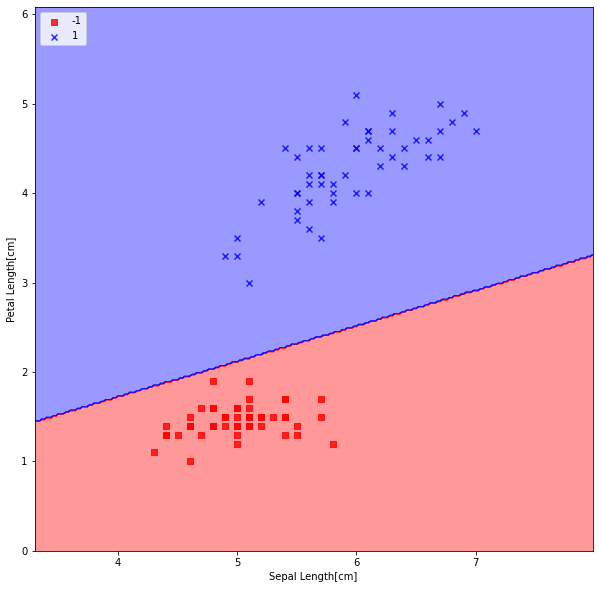

In [104]:
plt.figure(figsize=(10, 10))
decision_region(X, y, classfier=ppn)
plt.xlabel("Sepal Length[cm]")
plt.ylabel("Petal Length[cm]")
plt.legend(loc="upper left")
plt.show()